In [35]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [36]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [37]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [38]:
from utils import style, hdi, load_spectral_types

In [39]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [40]:
style(name="seaborn-notebook")

In [41]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [42]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [43]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [44]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [45]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [46]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(

## tes

In [47]:
index = 2
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [48]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
sigmaDD = df[:, :, 25].reshape(-1)
hDD = df[:, :, 26].reshape(-1)
rhoD = rhoDM + sigmaDD/(4*hDD)/1E-2
# mask = rhoDM > 0
# rhob = rhob[mask]
# rhoDM = rhoDM[mask]
# rhoD = rhoD[mask]
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

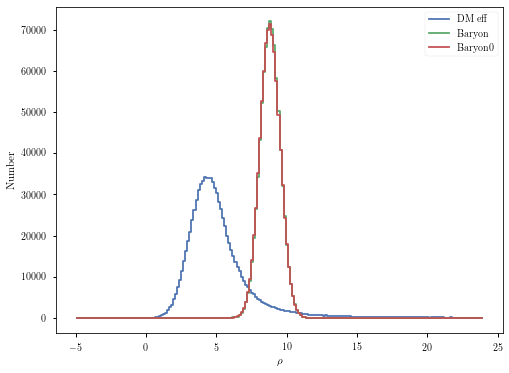

In [49]:
rho = np.linspace(-5, 24, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM eff')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [50]:
from scipy.optimize import curve_fit

def skewpdf(x, amp, a, loc, scale):
    return amp*skewnorm.pdf(x, a, loc, scale)
dx = rhomid[1]-rhomid[0]

rhoD_fit, _ = curve_fit(skewpdf, rhomid, rhoD_num/(rhoD_num.sum()*dx), p0=[1, 3, 1, 0.5])
# rhoD_fit = rhoD_fit[1:]

rhoD_sample = np.random.choice(rhoD, size=1_000)
# rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000)
rhob0_fit = norm.fit(rhob0_sample)
rhoD_fit

array([0.94355874, 2.32712236, 3.23301195, 2.18046359])

((6.405417165695415e-06, 8.89556924388702, 0.7128410332994679),
 (8.89513810867078, 0.7136168922905739))

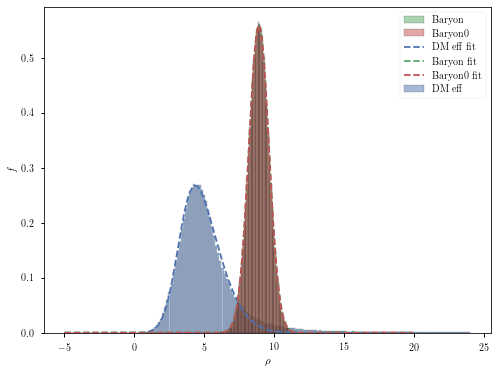

In [51]:
# plot
rho = np.arange(-5, 20, 0.1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(rhomid, rhoD_num/(rhoD_num.sum()*dx), width=dx, label='DM eff', ec='k', alpha=0.5, color='C0')
# ax.hist(rhoD, bins=rho, density=True, label='DM eff', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewpdf(rho, *rhoD_fit), label='DM eff fit', color='C0', ls='--')
# ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM eff fit', color='C0', ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhob_fit, rhob0_fit

rhoD = 4.52 +2.02/-1.80
rhob = 8.89 +0.71/-0.70
rhob0 = 8.89 +0.71/-0.70


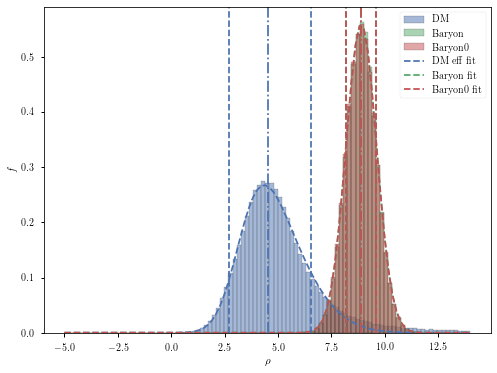

In [52]:
from utils import hdi_sample

sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi_sample(rhoD_sample, -5, 20, alpha=alpha[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewpdf(rho, *rhoD_fit), label='DM eff fit', color='C0', ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.70


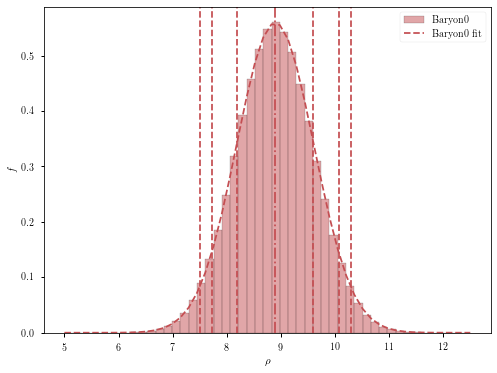

In [53]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [54]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []
rhoD_samples = []
rho = np.linspace(0, 24, 200)
rhomid = 0.5*(rho[1:] + rho[:-1])
dx = rhomid[1]-rhomid[0]
for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    sigmaDD = df[:, :, 25].reshape(-1)
    hDD = df[:, :, 26].reshape(-1)
    rhoD = rhoDM + sigmaDD/(4*hDD)/1E-2
    rhoD_sample = np.random.choice(rhoD, size=10_000)
    rhoD_samples.append(rhoD_sample)
    # mask = rhoDM > -3
    # rhob = rhob[mask]
    # rhoDM = rhoDM[mask]
    # rhoD = rhoD[mask]
    # rhoD_num, _ = np.histogram(rhoD, bins=rho)
    # print("fitting...")
    # rhoD_fit, _ = curve_fit(skewpdf, rhomid, rhoD_num/(rhoD_num.sum()*dx), p0=[1, 5, 1, 0.5])
    # rhoD_fits.append(rhoD_fit)
    # plt.bar(rhomid, rhoD_num/(rhoD_num.sum()*dx), width=dx, label='DM eff', ec='k', alpha=0.5, color='C0')
    # plt.plot(rho, skewpdf(rho, *rhoD_fit), label='DM eff fit', color='r', ls='--')
    # plt.title(file)
    # plt.show()
    # continue
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi_sample(rhoD_sample, -5, 24, alpha=alp)
        rhoD_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoD_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 15/15 [00:27<00:00,  1.84s/it]


In [55]:
rhoD_fits

[]

In [58]:
# # multiplying the rhoDM, but it became addition in log
# rho = np.linspace(-10, 14, 10000)
# log_rhoD = None
# for p in rhoD_fits:
#     if log_rhoD is None:
#         log_rhoD = np.log(skewpdf(rho, *p))
#     else:
#         log_rhoD += np.log(skewpdf(rho, *p))
#     # print(log_rhoD.sum())
# # turn into rhoDM
# rhoD_com = np.exp(log_rhoD)
# # normalize with max value
# rhoD_com /= rhoD_com.max()
# # plot
# fig, ax = plt.subplots()
# ax.plot(rho, rhoD_com, label='rhoD')
# ax.set_xlim(-5,5)
# rhoD_com

In [ ]:
# # def skewpdf(x, *args):
# #     A, other = args[0], args[1:]
# #     return A*skewnorm.pdf(x, *other)

# rhoD_com_fit, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[1, 1.0, 2.0, 1])
# rhoD_com_fit

array([ 1.98253592, -1.29066058,  0.31512771,  1.03006676])

(-1.0, 5.0)

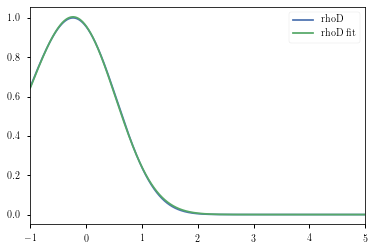

In [ ]:
# plt.plot(rho, rhoD_com, label='rhoD')
# plt.plot(rho, skewpdf(rho, *rhoD_com_fit), label='rhoD fit')
# plt.legend()
# plt.xlim(-1,5)

In [ ]:
# rhoD_com_err = []
# rhoD_com_mode = None
# for i, alp in enumerate(alpha):
#     hpd, modes = hdi(lambda x: skewpdf(x, *rhoD_com_fit), low=-1, high=5, alpha=alp)
#     low, high = hpd[0]
#     rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
#     rhoD_com_mode = modes[0]
# rhoD_com_mode, rhoD_com_err

(-0.24,
 [{'sigma': array([68, 90, 95]), 'low': -0.85, 'high': 0.33},
  {'sigma': array([68, 90, 95]), 'low': -1.0, 'high': 0.75},
  {'sigma': array([68, 90, 95]), 'low': -1.0, 'high': 1.0}])

In [59]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

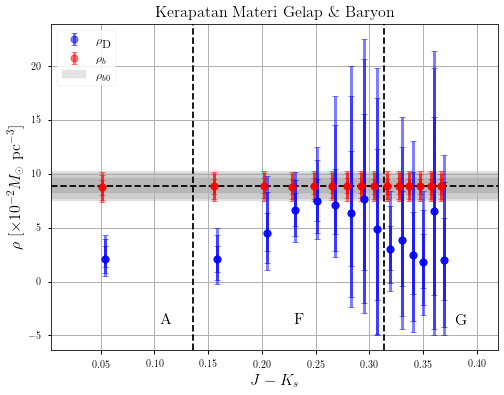

In [60]:
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c-0.003, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    # rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        # ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
        #           [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
        #           loc='best', fontsize=12)
        ax.legend([dm_ax, rhob_ax, rhob0_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$'],
                  loc='best', fontsize=12)
# real value
# ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.105, -4, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -4, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -4, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoD-dddm.pdf'), dpi=300)
plt.show()
# rhoD_com_mode

# $\Sigma$

In [ ]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [10]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [11]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [22]:
index = 0
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [23]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(

In [24]:
index = 2
df = np.load(files[index])
df.shape

(2500, 350, 35)

In [32]:
from scipy.stats import gaussian_kde

# estimate the density of (sigmaDD, hDD)
sigmaDD = df[:, :, 25].reshape(-1)
hDD = df[:, :, 26].reshape(-1)
mask = np.random.choice(np.arange(len(sigmaDD)), size=10_000)
sigmaDD = sigmaDD[mask]
hDD = hDD[mask]
xy = np.vstack([sigmaDD, hDD])
x = np.linspace(0, 30, 100)
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)
Z = gaussian_kde(xy)(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

vol = Z.sum()

Text(0.5, 1.0, 'Simplest default with labels')

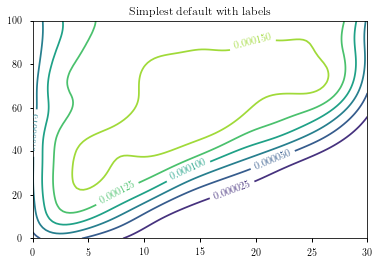

In [34]:
# plot the density
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z/vol)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')